In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler


In [2]:
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
regression_cols = ['federal_gross_income_adj', 'fam_size', 'age', 'fam_med_costs', 'weeks_unemployed', 'hours_worked', 'sex', 'employment', 'poverty_ratio']
regression = data.loc[:,regression_cols]
sex_map = {
    "Female":0,
    "Male": 1
}
poverty_ratio_map = {
    'BELOW POVERTY LEVEL' : "Impoverished" ,
    '150 AND ABOVE THE POVERTY LEVEL' : "Not Impoverished",
    '100 - 124 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    '125 - 149 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    'NOT IN POVERTY UNIVERSE' : "NIU"
}
regression.poverty_ratio = regression.poverty_ratio.map(poverty_ratio_map)
regression = regression[regression['poverty_ratio'] != 'NIU']
regression = regression.query("employment < 2")
regression.sex = regression.sex.map(sex_map)
regression = regression.loc[regression['federal_gross_income_adj']>=0]
regression.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,sex,employment,poverty_ratio
1,0,0,67,0,0,0,0,0,Impoverished
2,9,0,74,0,0,0,1,0,Impoverished
3,0,1,66,0,0,0,0,0,Not Impoverished
4,2400,1,68,0,0,0,0,0,Not Impoverished
5,47828,1,52,50,0,0,0,0,Not Impoverished


In [8]:
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,...,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,...,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,...,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [3]:
x = regression.drop(columns = 'poverty_ratio', axis = 1)
y = regression.poverty_ratio
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size=0.2
)
rus = RandomUnderSampler()
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)


In [9]:
x_train_rus

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,sex,employment
110777,0,1,52,0,0,0,0,0
19343,4044,1,80,0,0,0,1,0
8390,0,1,48,0,0,0,1,0
122812,0,1,14,0,0,0,0,0
78625,0,1,57,120,0,0,1,0
...,...,...,...,...,...,...,...,...
51995,0,1,11,250,0,0,0,0
34409,0,1,4,5000,0,0,0,0
106055,0,1,13,1200,0,0,1,0
145010,0,2,12,200,0,0,0,0


In [10]:
y_train_rus.value_counts()

poverty_ratio
Impoverished        22070
Not Impoverished    22070
Name: count, dtype: int64

In [11]:
x_test

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,sex,employment
8052,0,1,54,12000,0,10,1,1
21158,0,1,51,999,0,50,0,1
69026,4800,0,69,200,0,0,0,0
81717,160001,1,38,0,0,72,1,1
101671,0,1,17,4000,0,0,0,0
...,...,...,...,...,...,...,...,...
112679,0,1,40,8500,0,15,0,1
9847,10002,1,20,0,0,35,0,1
139909,91928,1,38,200,0,2,0,1
77000,54605,1,47,1400,0,25,1,1


In [12]:
y_test.value_counts()

poverty_ratio
Not Impoverished    23146
Impoverished         5556
Name: count, dtype: int64

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


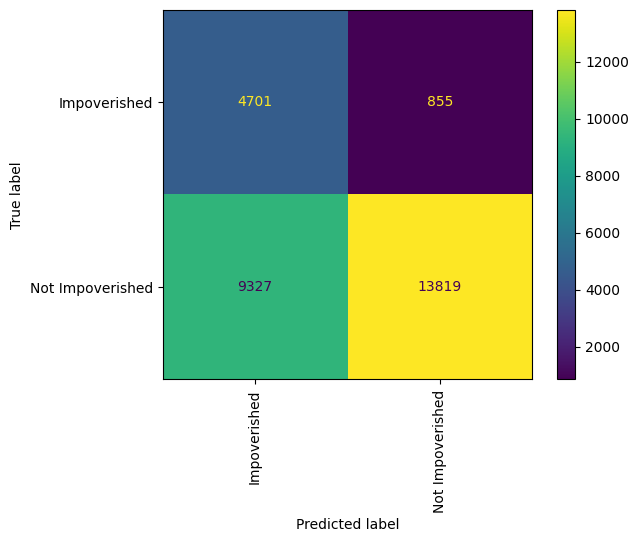

In [4]:
logreg = LogisticRegression()
logreg.fit(x_train_rus, y_train_rus)
logreg_preds = logreg.predict(x_test)
ConfusionMatrixDisplay.from_estimator(logreg, x_test, y_test, xticks_rotation='vertical')
plt.savefig('../site_pages/plots/logregCM.png')
logreg_accuracy = logreg.score(x_test, y_test)

In [5]:
logreg_accuracy

0.6452512020068288

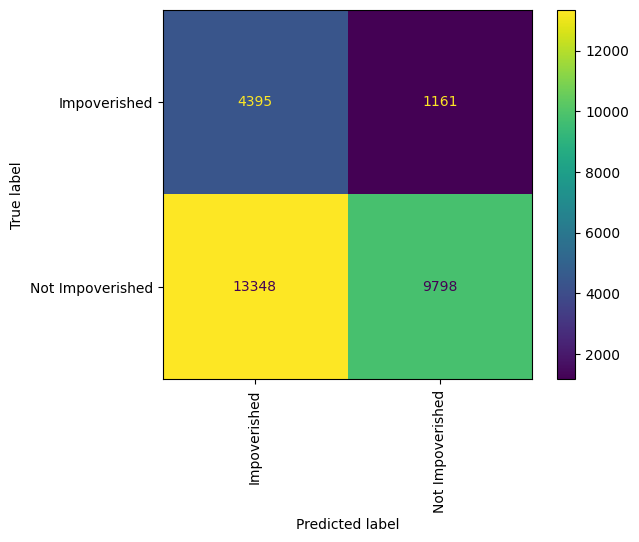

In [6]:
MNB = MultinomialNB()
MNB.fit(x_train_rus, y_train_rus)
Multinomial_Prediction = MNB.predict(x_test)
Multinomial_matrix = confusion_matrix(y_test, Multinomial_Prediction)
ConfusionMatrixDisplay.from_estimator(MNB, x_test, y_test, xticks_rotation='vertical')
plt.savefig('../site_pages/plots/Regression_MNBCM.png')
Multinomial_accuracy = MNB.score(x_test, y_test)

In [7]:
Multinomial_accuracy

0.49449515713190717